In [23]:
#remotes::install_github("quanteda/quanteda") 
install.packages("quanteda.textplots")

Installing package into ‘/home/wva/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [7]:
install.packages(c("glue", "tidyverse", "quanteda", "quanteda.textstats", "quanteda.textplots", "udpipe"))

Installing packages into ‘/home/wva/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [2]:
options(width=75)

In [24]:
library(glue)
library(tidyverse)
# Tokenization
library(quanteda)
library(quanteda.textstats)
library(quanteda.textplots)
# Natural language processing
library(udpipe)

In [10]:
texts = c("The caged bird sings with a fearful trill", 
          "for the caged bird sings of freedom")
d = dfm(texts)
# Inspect by converting to a (dense) matrix
convert(d, "matrix") 

Warning message in convert.dfm(d, "matrix"):
“omit_empty not used for 'to = "matrix"'”


,the,caged,bird,sings,with,a,fearful,trill,for,of,freedom
text1,1,1,1,1,1,1,1,1,0,0,0
text2,1,1,1,1,0,0,0,0,1,1,1


In [11]:
text = "I haven't seen John's derring-do"
tokens(text)

Tokens consisting of 1 document.
text1 :
[1] "I"          "haven't"    "seen"       "John's"     "derring-do"


In [12]:
haiku = "\u53e4\u6c60\u86d9\u98db\u3073\u8fbc\u3080\u6c34\u306e\u97f3"
tokens(haiku)

Tokens consisting of 1 document.
text1 :
[1] "古池"     "蛙"       "飛び込む" "水"       "の"       "音"      


In [13]:
sotu = read_csv("http://cssbook.net/d/sotu.csv") %>% 
       mutate(doc_id = paste(lubridate::year(Date), President, delivery))
d = corpus(sotu) %>% dfm()
d


── Column specification ────────────────────────────────────────────────────────
cols(
  FirstName = col_character(),
  President = col_character(),
  Date = col_date(format = ""),
  delivery = col_character(),
  type = col_character(),
  party = col_character(),
  text = col_character()
)




Document-feature matrix of: 85 documents, 18,165 features (91.1% sparse) and 6 docvars.
                        features
docs                      to  the congress  :  in considering state   of union
  1945 Roosevelt written 247  642       14  6 236           1     5  376     2
  1945 Roosevelt spoken  110  238        8  3  90           0     1  137     0
  1946 Truman written    738 2141       74 17 669           4    24 1264     8
  1947 Truman spoken     227  473       27  7 132           1     5  292     7
  1948 Truman spoken     175  325       15  2  98           0     7  252     5
  1949 Truman spoken     139  239       17  2  69           1     1  150     1
                        features
docs                        ,
  1945 Roosevelt written  351
  1945 Roosevelt spoken   139
  1946 Truman written    1042
  1947 Truman spoken      236
  1948 Truman spoken      155
  1949 Truman spoken      148
[ reached max_ndoc ... 79 more documents, reached max_nfeat ... 18,155 more feature

In [20]:
textstat_frequency(d)[c(1, 10, 100, 1000, 15000)]

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
1,the,34999,1,85,all
10,our,9334,10,85,all
100,first,750,100,83,all
1000,investments,76,988,34,all
15000,tobago,1,11005,1,all


In [21]:
as.matrix(d[c(3, 25, 50, 75), c("the", "our", "first", "investments", "defrauded")])

,the,our,first,investments,defrauded
1946 Truman written,2141,186,21,2,0
1965 Johnson spoken,283,81,14,0,0
1984 Reagan spoken,209,92,8,0,0
2009 Obama spoken,269,116,8,1,0


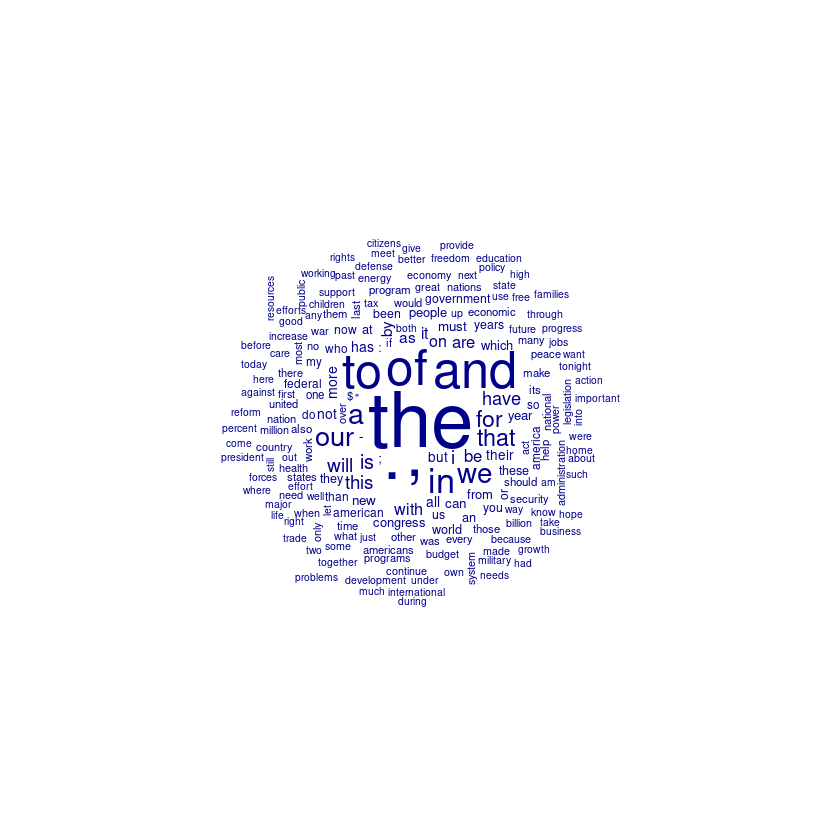

In [26]:
textplot_wordcloud(d, max_words=200)

In [27]:
url = "http://cssbook.net/d/trumptweets.csv"
tweets = read_csv(url, col_types=cols_only(text='c', status_id='c')) 
head(tweets)

status_id,text
<chr>,<chr>
x1864367186,Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6
x9273573134835712,"Congratulations to Evan Lysacek for being nominated SI sportsman of the year. He's a great guy, and he has my vote! #EvanForSI"
x29014512646,"I was on The View this morning. We talked about The Apprentice. Tonight's episode is a great one--tough, exciting and surprising. 10 pm/NBC"
x7483813542232064,Tomorrow night's episode of The Apprentice delivers excitement at QVC along with appearances by Isaac Mizrahi and Cathie Black. 10 pm on NBC
x5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc"
x14785576859340800,"I'll be appearing on Larry King Live for his final show, Thursday night at 9 p.m., CNN. Larry's been on TV for 25 years..."


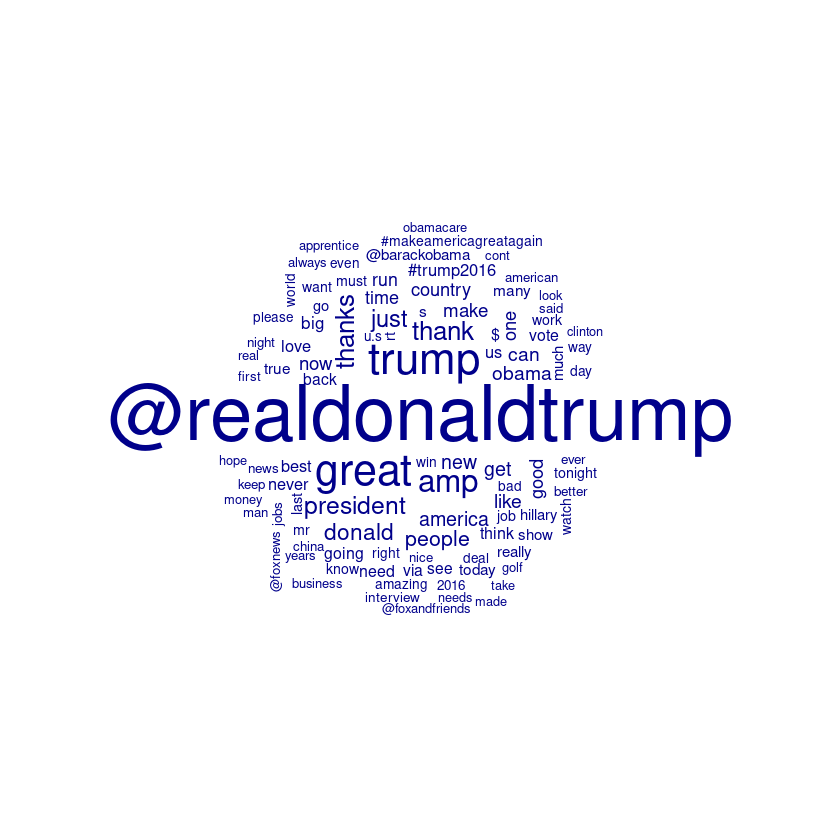

In [28]:
d = corpus(tweets) %>% dfm(remove=stopwords('english'), remove_punct=T)
textplot_wordcloud(d, max_words=100)



In [29]:
mystopwords = stopwords('english', source="snowball")
mystopwords = c( "go", "one", mystopwords)
glue("Now {length(mystopwords)} stopwords: {paste(mystopwords[1:5], collapse=', ')}...")



Now 177 stopwords: go, one, i, me, my...

In [30]:
d_trim = dfm_trim(d, min_docfreq = 0.005, max_docfreq = 0.75, docfreq_type = "prop")
glue("# of unique words before trimming: {ncol(d)}; after trimming: {ncol(d_trim)}")


# of unique words before trimming: 44386; after trimming: 301

In [31]:
d_tf = corpus(sotu) %>% dfm() %>% dfm_tfidf(scheme_tf="prop", smoothing=1)
as.matrix(d_tf [c(3, 25, 50, 75), c("the", "our", "first", "investments", "defrauded")])

,the,our,first,investments,defrauded
1946 Truman written,0.02084698,0.001811087,0.0002080106,3.519654e-05,0
1965 Johnson spoken,0.01746801,0.004999678,0.0008790725,0.000000e+00,0
1984 Reagan spoken,0.01132996,0.004987351,0.0004411759,0.000000e+00,0
2009 Obama spoken,0.01208793,0.005212641,0.0003657038,8.121631e-05,0


In [32]:
single_tweet = tweets$text[tweets$status_id == "x263687274812813312"]
glue("Raw:\n{single_tweet}")
tweet_tokens = tokens(single_tweet)
glue("After tokenizing:\n{paste(tweet_tokens, collapse=' | ')}")

Raw:
Part 1 of my @jimmyfallon interview discussing my $5M offer to Obama, #TRUMP Tower atrium, my tweets &amp; 57th st. crane http://t.co/AvLO9Inf

After tokenizing:
Part | 1 | of | my | @jimmyfallon | interview | discussing | my | $ | 5M | offer | to | Obama | , | #TRUMP | Tower | atrium | , | my | tweets | & | amp | ; | 57th | st | . | crane | http://t.co/AvLO9Inf

In [33]:
single_tweet = single_tweet  %>% str_remove_all("\\bhttps?://\\S*|&\\w+;")
tweet_tokens = tokens(single_tweet)
glue("After pre-processing:\n{paste(tweet_tokens, collapse=' | ')}")

After pre-processing:
Part | 1 | of | my | @jimmyfallon | interview | discussing | my | $ | 5M | offer | to | Obama | , | #TRUMP | Tower | atrium | , | my | tweets | 57th | st | . | crane

In [34]:
tweet_tokens = tweet_tokens  %>% tokens_tolower()  %>% 
  tokens_remove(stopwords('english')) %>% 
  tokens_keep("^\\p{LETTER}", valuetype='regex')
glue("After pruning tokens:\n{paste(tweet_tokens, collapse=' | ')}")

After pruning tokens:
part | interview | discussing | offer | obama | tower | atrium | tweets | st | crane

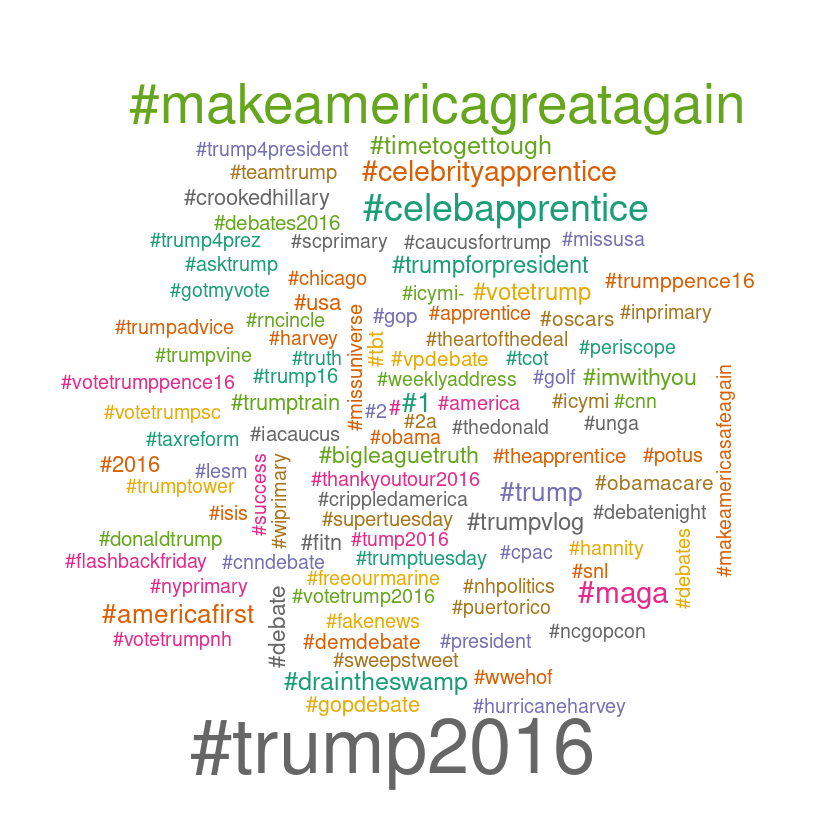

In [35]:
dfm_cleaned = tweets %>% 
  corpus() %>% 
  tokens()  %>% 
  tokens_keep("^#", valuetype='regex')  %>% 
  dfm()
colors = RColorBrewer::brewer.pal(8, "Dark2")
textplot_wordcloud(dfm_cleaned, max_words=100, min_size = 1, max_size=4, 
                   random_order = TRUE, random_color= TRUE, color=colors)

In [36]:
glove_fn = 'glove.6B.50d.10k.w2v.txt'
url = glue('http://cssbook.net/d/{glove_fn}')
if (!file.exists(glove_fn)) 
    download.file(url, glove_fn)

In [21]:
wv_tibble = read_delim(glove_fn, skip=1, delim=" ", quote="", 
    col_names = c("word", paste0("d", 1:50)))
wv = as.matrix(wv_tibble[-1])
rownames(wv) = wv_tibble$word
wv = wv / sqrt(rowSums(wv^2))
wv[order(wv[,1])[1:5], 1:5]


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  word = col_character()
)
ℹ Use `spec()` for the full column specifications.




,d1,d2,d3,d4,d5
20003,-0.4402265,0.07209431,-0.02397687,0.18428984,0.001802660
basketball,-0.4234652,0.23817458,-0.09346347,0.17270343,-0.001520135
collegiate,-0.4232457,0.23873925,-0.28741579,0.02797958,-0.066008001
volleyball,-0.4217268,0.18378662,-0.26229465,0.31409226,-0.124286069
ncaa,-0.4131240,0.14502199,-0.06088206,0.17017979,-0.157397324


In [22]:
wvector = function(wv, word) wv[rownames(wv) == word,,drop=F]
wv_similar = function(wv, target, n=5) {
  similarities = wv %*% t(target)
  similarities %>% as_tibble(rownames = "word") %>% 
    rename(similarity=2) %>% 
    arrange(-similarity) %>% 
    head(n=n)  
}
wv_similar(wv, wvector(wv, "fraud"))

word,similarity
<chr>,<dbl>
fraud,1.0000000
charges,0.8591152
bribery,0.8559850
alleged,0.8415063
corruption,0.8299386


In [23]:
wv_analogy = function(wv, a, b, c) {
  result = wvector(wv, b) + wvector(wv, c) - wvector(wv, a)
  matches = wv_similar(wv, result) %>% 
    filter(!word %in% c(a,b,c))
  matches$word[1]
}
for (x in c("king", "boy", "father", "pete", "football")) {
    y = wv_analogy(wv, 'man', x, 'woman')
    print(glue("Man is to {x} as woman is to: {y}"))
}

Man is to king as woman is to: queen
Man is to boy as woman is to: girl
Man is to father as woman is to: mother
Man is to pete as woman is to: barbara
Man is to football as woman is to: soccer


In [24]:
text = "This is a test"
tokens(text)  %>% tokens_tolower() %>% tokens_ngrams(1:3)

Tokens consisting of 1 document.
text1 :
[1] "this"      "is"        "a"         "test"      "this_is"   "is_a"     
[7] "a_test"    "this_is_a" "is_a_test"


In [25]:
sotu_tokens = corpus(sotu)  %>%  tokens(remove_punct=T)  %>%  
  tokens_remove(stopwords('english')) %>% tokens_tolower()
dfm_bigram = sotu_tokens %>% tokens_ngrams(1:2) %>% dfm()
textstat_frequency(dfm_bigram)  %>% filter(str_detect(feature, "government"))  %>% head(12)

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
10,government,1424,10,84,all
198,federal_government,265,198,56,all
318,governments,188,318,50,all
652,local_governments,104,648,28,all
976,government's,71,972,25,all
1208,government_must,55,1195,28,all
1453,government_can,44,1433,26,all
1545,governmental,41,1537,19,all
1951,local_government,32,1919,16,all


In [26]:
sotu_tokens = corpus(sotu)  %>% 
  tokens(remove_punct=T) %>% 
  tokens_tolower()

colloc = sotu_tokens %>% 
  textstat_collocations(min_count=10) %>% 
  as_tibble() 


colloc %>% arrange(-lambda)  %>% head()

collocation,count,count_nested,length,lambda,z
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
saddam hussein,26,0,2,15.24283,10.344953
iron curtain,11,0,2,15.17020,9.848553
al qaida,37,0,2,14.58446,10.123585
red tape,22,0,2,13.46976,15.143997
persian gulf,31,0,2,12.90333,18.512811
line-item veto,10,0,2,12.85070,8.813419


In [27]:
collocations = colloc  %>% 
  filter(lambda > 8)  %>%  
  pull(collocation)  %>%  
  phrase()
dfm = sotu_tokens %>% 
  tokens_compound(collocations) %>% 
  dfm()
textstat_frequency(dfm) %>% 
  filter(str_detect(feature, "hussein"))

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<int>,<dbl>,<chr>
2186,saddam_hussein,26,2120,5,all
8529,hussein's,3,7341,2,all


In [28]:
udpipe("John bought new knives", "english") %>% select(token_id:upos, head_token_id:dep_rel)


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




token_id,token,lemma,upos,head_token_id,dep_rel
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,John,John,PROPN,2,nsubj
2,bought,buy,VERB,0,root
3,new,new,ADJ,4,amod
4,knives,knife,NOUN,2,obj


`summarise()` ungrouping output (override with `.groups` argument)



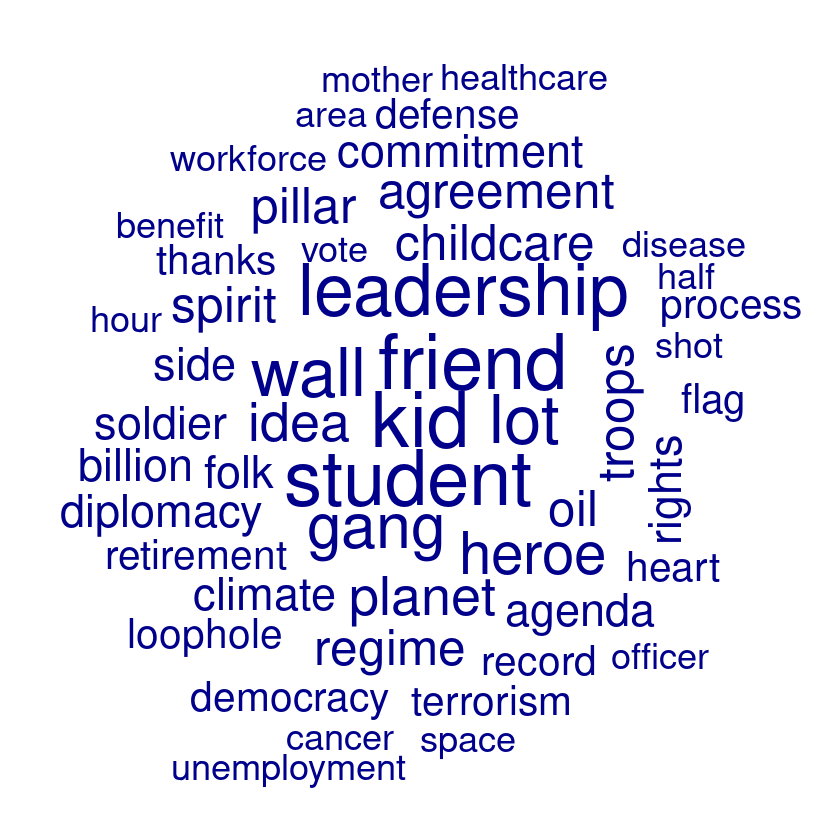

In [25]:
tokens = sotu %>% top_n(5, Date) %>%  udpipe("english", parser='none')
nouns = tokens  %>% filter(upos == "NOUN") %>% 
  group_by(doc_id)  %>% summarize(text=paste(lemma, collapse=" "))
nouns %>% corpus() %>% dfm() %>% 
  dfm_trim(max_docfreq=0.7, docfreq_type='prop')  %>% 
  textplot_wordcloud(max_words=50)

In [31]:
spacy_download_langmodel("es")
# Note: English model is downloaded (and activated)
#       by default, you only need this for other languages

Installing model "en"


Language model "en" is successfully installed


Found 'spacy_condaenv'. spacyr will use this environment

successfully initialized (spaCy Version: 2.3.2, language model: en)

(python options: type = "condaenv", value = "spacy_condaenv")



In [36]:
spacy_initialize("es")
spacy_parse("Todos los caminos llevan a Roma")
# Note: use spacy_finalize() to close spacy or switch languages

spaCy is already initialized



NULL

Warning message in spacy_parse.character("Todos los caminos llevan a Roma"):
“lemmatization may not work properly in model 'es'”


doc_id,sentence_id,token_id,token,lemma,pos,entity
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
text1,1,1,Todos,Todos,DET,
text1,1,2,los,lo,DET,
text1,1,3,caminos,camino,NOUN,
text1,1,4,llevan,llevar,AUX,
text1,1,5,a,a,ADP,
text1,1,6,Roma,Roma,PROPN,LOC_B
